<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [255]:
from google_play_scraper import app

import pandas as pd

import numpy as np

import seaborn as sns

In [256]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1300, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

Problems slovlig tools = mencari akar permasalahan pada suatu masalah

5 why

metode mencari problems sloving dengan cara menanyakan apa penyebab permasalahaan muncul dan mencari jawabannya. hal ini di lakUkan berkali klai sampai permasalahan dapat tergambar dengan jelas

action priority 

diagram yang dapat di gunakan untuk mencari prioritas masalah berdasarkan impact atas benefit yang bisa diberikan dengan diagram ini kita memilih masalah yang impactnya mayoritas dari permasalahan yang ada.

fishbone digram 

digram yang dapat di gunakan untuk merinci masalah dan membantu mencari akar masalah yang dapat dilihat dari beberapa point of view

flowchart/algo

metode pemecahan masalah dengan cara memetakan flow atau membuat pseudo algoritma yang untuk menentukan masalah dan cara untuk mencari solusinya secara sistematis

In [257]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f2e26548-83d2-4bcf-bac3-6dc9db1cb12d,Nizar Rayyan,https://play-lh.googleusercontent.com/a-/AD_cM...,Paylater ngk bener.. selalu di batalkan otomat...,1,331,5.31.3,2023-04-16 23:03:31,"Hai, mohon maaf atas ketidaknyamanannya. Jika ...",2020-03-06 11:44:30,5.31.3
1,08f05b3b-be88-43f2-a300-aaebf6585655,Ganjar Hermadi,https://play-lh.googleusercontent.com/a-/AD_cM...,Pengembalian dana otomatis ga berfungsi...sy l...,1,48,5.32.1,2023-05-27 23:42:34,None,NaT,5.32.1
2,5ef5f760-f72a-473b-9fb3-48e5556cefc6,Fandy Komo,https://play-lh.googleusercontent.com/a/AAcHTt...,Tambah kesini buka lapak tambah kurang bagus p...,1,178,5.31.3,2023-05-05 02:37:25,None,NaT,5.31.3
3,bbe0ea76-bbd1-469d-810c-d13eae3d175d,Musthofa Zainul,https://play-lh.googleusercontent.com/a-/AD_cM...,Saya sudah lama sekali menjadi pengguna bukala...,5,4,5.31.3,2023-05-30 17:11:17,None,NaT,5.31.3
4,17640730-6dcd-4836-9cd9-2e99a36d2be6,Yuda Nugraha,https://play-lh.googleusercontent.com/a-/AD_cM...,"Di update malah ngaco ini aplikasi, menu baran...",3,12,5.32.2,2023-05-31 10:59:36,None,NaT,5.32.2


In [258]:
len(df_busu.index) #count the number of data we got

1300

In [259]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
1295,styleispassion,1,2023-05-30 06:40:50,Maaf. Saya sudah tidak jualan lagi di BL. Dan ...
1296,Muhyi Fadli,4,2023-06-01 10:19:23,Bagus tingkatkan layanan
1297,Dasa Eka,5,2023-05-25 10:09:47,Barang diterima tepat waktu dan packing rapih
1298,mulyanajayameuble meuble,5,2023-05-21 06:11:13,"Mantap,luar biasa pelayanannya"
1299,Barzah Muttaqin Suhanda,5,2023-05-07 22:46:59,Aplikasi bagus dan berfaedah terima kasih buka...


In [260]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [261]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
1295,styleispassion,1,2023-05-30 06:40:50,Maaf. Saya sudah tidak jualan lagi di BL. Dan ...
1296,Muhyi Fadli,4,2023-06-01 10:19:23,Bagus tingkatkan layanan
1297,Dasa Eka,5,2023-05-25 10:09:47,Barang diterima tepat waktu dan packing rapih
1298,mulyanajayameuble meuble,5,2023-05-21 06:11:13,"Mantap,luar biasa pelayanannya"
1299,Barzah Muttaqin Suhanda,5,2023-05-07 22:46:59,Aplikasi bagus dan berfaedah terima kasih buka...


In [262]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1300 non-null   object        
 1   Rating         1300 non-null   int64         
 2   Date           1300 non-null   datetime64[ns]
 3   Ulasan         1300 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.8+ KB


In [263]:
import nltk

In [264]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [265]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,Nizar Rayyan,1,2023-04-16 23:03:31,Paylater ngk bener.. selalu di batalkan otomat...
1,Ganjar Hermadi,1,2023-05-27 23:42:34,Pengembalian dana otomatis ga berfungsi...sy l...
2,Fandy Komo,1,2023-05-05 02:37:25,Tambah kesini buka lapak tambah kurang bagus p...
3,Musthofa Zainul,5,2023-05-30 17:11:17,Saya sudah lama sekali menjadi pengguna bukala...
4,Yuda Nugraha,3,2023-05-31 10:59:36,"Di update malah ngaco ini aplikasi, menu baran..."


In [266]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

In [267]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [268]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [269]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [270]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

In [271]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [272]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o..."
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy..."
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ..."
3,Musthofa Zainul,5,2023-05-30 17:11:17,saya sudah lama sekali menjadi pengguna bukala...,"[saya, sudah, lama, sekali, menjadi, pengguna,..."
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu..."
...,...,...,...,...,...
1295,styleispassion,1,2023-05-30 06:40:50,maaf saya sudah tidak jualan lagi di bl dan pe...,"[maaf, saya, sudah, tidak, jualan, lagi, di, b..."
1296,Muhyi Fadli,4,2023-06-01 10:19:23,bagus tingkatkan layanan,"[bagus, tingkatkan, layanan]"
1297,Dasa Eka,5,2023-05-25 10:09:47,barang diterima tepat waktu dan packing rapih,"[barang, diterima, tepat, waktu, dan, packing,..."
1298,mulyanajayameuble meuble,5,2023-05-21 06:11:13,mantapluar biasa pelayanannya,"[mantapluar, biasa, pelayanannya]"


In [273]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [274]:
#Run This Code to Sort the Data By Date 
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
187,Al Jaras,4,2023-06-04 13:15:56,kok sekrng bnyak problem ya di blkadang mo mas...,"[kok, sekrng, bnyak, problem, ya, di, blkadang..."
178,Ferdinand Enduy,5,2023-06-04 13:03:37,belanja online dengan sangat mudah lumayan len...,"[belanja, online, dengan, sangat, mudah, lumay..."
875,Raden Ociem,5,2023-06-04 12:21:19,mantap cuma sayang sekarang jarang ada vocer p...,"[mantap, cuma, sayang, sekarang, jarang, ada, ..."
660,thegokilz 867,5,2023-06-04 11:34:54,sangat cocok untuk semua kalangan baik usia mu...,"[sangat, cocok, untuk, semua, kalangan, baik, ..."
13,Lutfipitrahadi Pitrahadi,1,2023-06-04 10:54:22,kalo bisa di kosongkan saya kosongkan bintangn...,"[kalo, bisa, di, kosongkan, saya, kosongkan, b..."


In [275]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [276]:
import pandas as pd

# Assuming you have a DataFrame named ulasan with columns 'Ulasan_tokenize' and 'Ulasan_ears'

word_to_erase = 'nya'  # Replace 'word' with the word you want to erase

name_dataframe["ulasan_ears"] = name_dataframe['Ulasan_tokenize'].apply(lambda x: [word for word in x if word != word_to_erase])

print(name_dataframe)


                 Nama pengguna  Rating                Date  \
0                 Nizar Rayyan       1 2023-04-16 23:03:31   
1               Ganjar Hermadi       1 2023-05-27 23:42:34   
2                   Fandy Komo       1 2023-05-05 02:37:25   
3              Musthofa Zainul       5 2023-05-30 17:11:17   
4                 Yuda Nugraha       3 2023-05-31 10:59:36   
...                        ...     ...                 ...   
1295            styleispassion       1 2023-05-30 06:40:50   
1296               Muhyi Fadli       4 2023-06-01 10:19:23   
1297                  Dasa Eka       5 2023-05-25 10:09:47   
1298  mulyanajayameuble meuble       5 2023-05-21 06:11:13   
1299   Barzah Muttaqin Suhanda       5 2023-05-07 22:46:59   

                                                 Ulasan  \
0     paylater ngk bener selalu di batalkan otomatis...   
1     pengembalian dana otomatis ga berfungsisy lg b...   
2     tambah kesini buka lapak tambah kurang bagus p...   
3     saya sudah la

In [277]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, ngk, bener, selalu, di, batalkan, o..."
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, ga, berfungsisy..."
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ..."
3,Musthofa Zainul,5,2023-05-30 17:11:17,saya sudah lama sekali menjadi pengguna bukala...,"[saya, sudah, lama, sekali, menjadi, pengguna,...","[saya, sudah, lama, sekali, menjadi, pengguna,..."
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, ngaco, ini, aplikasi, menu..."


In [278]:
new_df = name_dataframe

In [279]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['ulasan_ears'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(tidak, 4), (di, 3), (kadang, 2), (gantian, 2...
1    [(ga, 3), (dana, 2), (tombol, 2), (pengembalia...
2    [(tambah, 3), (buka, 2), (susah, 2), (di, 2), ...
3    [(saya, 4), (ada, 2), (tidak, 2), (di, 2), (su...
4    [(di, 5), (barang, 3), (cari, 3), (malah, 2), ...
Name: ulasan_ears, dtype: object


In [280]:
print(name_dataframe.columns)

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'ulasan_ears'],
      dtype='object')


In [281]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [paylater, ngk, bener, selalu, di, batalkan, o...
1       [pengembalian, dana, otomatis, ga, berfungsisy...
2       [tambah, kesini, buka, lapak, tambah, kurang, ...
3       [saya, sudah, lama, sekali, menjadi, pengguna,...
4       [di, update, malah, ngaco, ini, aplikasi, menu...
                              ...                        
1295    [maaf, saya, sudah, tidak, jualan, lagi, di, b...
1296                         [bagus, tingkatkan, layanan]
1297    [barang, diterima, tepat, waktu, dan, packing,...
1298                    [mantapluar, biasa, pelayanannya]
1299    [aplikasi, bagus, dan, berfaedah, terima, kasi...
Name: Ulasan_tokenize, Length: 1300, dtype: object>

In [282]:
slank_word_dict = {
    "berjalansudah" : "berjalan",
    "paraah" : "parah",
    "keduakali" : "",
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [283]:
normalizad_word = pd.read_csv("/content/kamusindonesia.csv (2).csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [284]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [285]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan..."
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, enggak, berfung..."
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ..."
3,Musthofa Zainul,5,2023-05-30 17:11:17,saya sudah lama sekali menjadi pengguna bukala...,"[saya, sudah, lama, sekali, menjadi, pengguna,...","[saya, sudah, lama, sekali, menjadi, pengguna,...","[saya, sudah, lama, sekali, menjadi, pengguna,..."
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, mengaco, ini, aplikasi, me..."
...,...,...,...,...,...,...,...
1295,styleispassion,1,2023-05-30 06:40:50,maaf saya sudah tidak jualan lagi di bl dan pe...,"[maaf, saya, sudah, tidak, jualan, lagi, di, b...","[maaf, saya, sudah, tidak, jualan, lagi, di, b...","[maaf, saya, sudah, tidak, jualan, lagi, di, b..."
1296,Muhyi Fadli,4,2023-06-01 10:19:23,bagus tingkatkan layanan,"[bagus, tingkatkan, layanan]","[bagus, tingkatkan, layanan]","[bagus, tingkatkan, layanan]"
1297,Dasa Eka,5,2023-05-25 10:09:47,barang diterima tepat waktu dan packing rapih,"[barang, diterima, tepat, waktu, dan, packing,...","[barang, diterima, tepat, waktu, dan, packing,...","[barang, diterima, tepat, waktu, dan, packing,..."
1298,mulyanajayameuble meuble,5,2023-05-21 06:11:13,mantapluar biasa pelayanannya,"[mantapluar, biasa, pelayanannya]","[mantapluar, biasa, pelayanannya]","[mantapluar, biasa, pelayanannya]"


In [286]:
name_dataframe['Ulasan_normalized'].unique

<bound method Series.unique of 0       [paylater, enggak, benar, selalu, di, batalkan...
1       [pengembalian, dana, otomatis, enggak, berfung...
2       [tambah, kesini, buka, lapak, tambah, kurang, ...
3       [saya, sudah, lama, sekali, menjadi, pengguna,...
4       [di, update, malah, mengaco, ini, aplikasi, me...
                              ...                        
1295    [maaf, saya, sudah, tidak, jualan, lagi, di, b...
1296                         [bagus, tingkatkan, layanan]
1297    [barang, diterima, tepat, waktu, dan, packing,...
1298                    [mantapluar, biasa, pelayanannya]
1299    [aplikasi, bagus, dan, berfaedah, terima, kasi...
Name: Ulasan_normalized, Length: 1300, dtype: object>

In [287]:
from nltk.corpus import stopwords

In [288]:
list_stopwords = stopwords.words('indonesian')

In [289]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal) 

In [290]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga..."
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, enggak, berfung...","[pengembalian, dana, otomatis, berfungsisy, bu..."
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom..."
3,Musthofa Zainul,5,2023-05-30 17:11:17,saya sudah lama sekali menjadi pengguna bukala...,"[saya, sudah, lama, sekali, menjadi, pengguna,...","[saya, sudah, lama, sekali, menjadi, pengguna,...","[saya, sudah, lama, sekali, menjadi, pengguna,...","[pengguna, bukalapak, bingung, mengadu, transa..."
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, mengaco, ini, aplikasi, me...","[update, mengaco, aplikasi, menu, barang, favo..."
...,...,...,...,...,...,...,...,...
1295,styleispassion,1,2023-05-30 06:40:50,maaf saya sudah tidak jualan lagi di bl dan pe...,"[maaf, saya, sudah, tidak, jualan, lagi, di, b...","[maaf, saya, sudah, tidak, jualan, lagi, di, b...","[maaf, saya, sudah, tidak, jualan, lagi, di, b...","[maaf, jualan, bl, pengajuan, penghapusan, tok..."
1296,Muhyi Fadli,4,2023-06-01 10:19:23,bagus tingkatkan layanan,"[bagus, tingkatkan, layanan]","[bagus, tingkatkan, layanan]","[bagus, tingkatkan, layanan]","[bagus, tingkatkan, layanan]"
1297,Dasa Eka,5,2023-05-25 10:09:47,barang diterima tepat waktu dan packing rapih,"[barang, diterima, tepat, waktu, dan, packing,...","[barang, diterima, tepat, waktu, dan, packing,...","[barang, diterima, tepat, waktu, dan, packing,...","[barang, diterima, packing, rapi]"
1298,mulyanajayameuble meuble,5,2023-05-21 06:11:13,mantapluar biasa pelayanannya,"[mantapluar, biasa, pelayanannya]","[mantapluar, biasa, pelayanannya]","[mantapluar, biasa, pelayanannya]","[mantapluar, pelayanannya]"


In [291]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [292]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [293]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

4563
------------------------
paylater : paylater
batalkan : batal
otomatis : otomatis
kadang : kadang
nya : nya
gantian : ganti
jatuh : jatuh
tempo : tempo
bayar : bayar
biaya : biaya
keterlambatan : lambat
layanan : layan
biar : biar
merasakan : rasa
rasakan : rasa
sistem : sistem
seenak : enak
chat : chat
susah : susah
error : error
menyalahkan : salah
bikin : bikin
pusing : pusing
pengembalian : kembali
dana : dana
berfungsisy : berfungsisy
butuh : butuh
banget : banget
dananya : dana
ajuin : ajuin
komplainada : komplainada
tombol : tombol
komplain : komplain
diarahin : diarahin
pusat : pusat
bantuan : bantu
pengajuan : aju
pembatalanpengembalian : pembatalanpengembalian
aplikasinya : aplikasi
payahmenyulitkan : payahmenyulitkan
konsumen : konsumen
kesini : kesini
buka : buka
lapak : lapak
bagus : bagus
pelayanannya : layan
komplan : komplan
beberapakali : beberapakali
transaksi : transaksi
rekening : rekening
deh : deh
kepotong : potong
lapaknya : lapak
terverifikasi : verifikasi


Pandas Apply:   0%|          | 0/1300 [00:00<?, ?it/s]

In [294]:
name_dataframe["Ulasan_clean"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]


In [295]:
name_dataframe.to_excel("tokped_text.xlsx")

In [296]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_clean'])

In [297]:
tokenize_ulasan = word_tokenize(ulasan)

In [298]:
tokenize_ulasan

['paylater',
 'batal',
 'otomatis',
 'kadang',
 'nya',
 'ganti',
 'jatuh',
 'tempo',
 'bayar',
 'biaya',
 'lambat',
 'biaya',
 'layan',
 'biar',
 'rasa',
 'rasa',
 'sistem',
 'enak',
 'nya',
 'chat',
 'susah',
 'kadang',
 'error',
 'salah',
 'layan',
 'nya',
 'bikin',
 'pusing',
 'ganti',
 'pusing',
 'kembali',
 'dana',
 'otomatis',
 'berfungsisy',
 'butuh',
 'banget',
 'dana',
 'ajuin',
 'komplainada',
 'tombol',
 'komplain',
 'diarahin',
 'pusat',
 'bantu',
 'tombol',
 'aju',
 'pembatalanpengembalian',
 'dana',
 'aplikasi',
 'payahmenyulitkan',
 'konsumen',
 'kesini',
 'buka',
 'lapak',
 'bagus',
 'layan',
 'komplan',
 'susah',
 'susah',
 'banget',
 'beberapakali',
 'transaksi',
 'rekening',
 'deh',
 'potong',
 'buka',
 'lapak',
 'verifikasi',
 'kalo',
 'pengin',
 'komplain',
 'menu',
 'upload',
 'bukti',
 'bayar',
 'muncul',
 'kali',
 'kali',
 'hilang',
 'uang',
 'bayar',
 'gagal',
 'verifikasi',
 'guna',
 'bukalapak',
 'bingung',
 'adu',
 'transaksi',
 'masalah',
 'lapak',
 'proses

In [299]:
fqdist = FreqDist(tokenize_ulasan)

In [300]:
fqdist

FreqDist({'bukalapak': 506, 'aplikasi': 482, 'barang': 424, 'nya': 417, 'pakai': 251, 'buka': 233, 'belanja': 229, 'kirim': 226, 'beli': 225, 'lapak': 220, ...})

In [301]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('bukalapak', 506),
 ('aplikasi', 482),
 ('barang', 424),
 ('nya', 417),
 ('pakai', 251),
 ('buka', 233),
 ('belanja', 229),
 ('kirim', 226),
 ('beli', 225),
 ('lapak', 220),
 ('bayar', 212),
 ('transaksi', 192),
 ('bantu', 161),
 ('jual', 157),
 ('bagus', 142)]

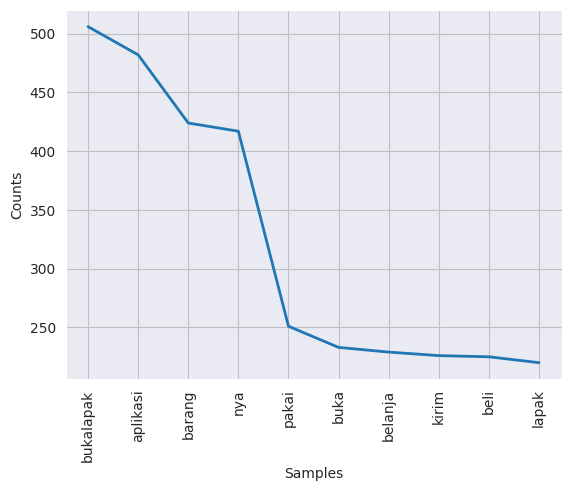

In [302]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [303]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, enggak, berfung...","[pengembalian, dana, otomatis, berfungsisy, bu...","[kembali, dana, otomatis, berfungsisy, butuh, ...",kembali dana otomatis berfungsisy butuh banget...,0
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom...","[kesini, buka, lapak, bagus, layan, komplan, s...",kesini buka lapak bagus layan komplan susah su...,0
3,Musthofa Zainul,5,2023-05-30 17:11:17,saya sudah lama sekali menjadi pengguna bukala...,"[saya, sudah, lama, sekali, menjadi, pengguna,...","[saya, sudah, lama, sekali, menjadi, pengguna,...","[saya, sudah, lama, sekali, menjadi, pengguna,...","[pengguna, bukalapak, bingung, mengadu, transa...","[guna, bukalapak, bingung, adu, transaksi, mas...",guna bukalapak bingung adu transaksi masalah l...,1
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, mengaco, ini, aplikasi, me...","[update, mengaco, aplikasi, menu, barang, favo...","[update, aco, aplikasi, menu, barang, favorit,...",update aco aplikasi menu barang favorit enggak...,0
...,...,...,...,...,...,...,...,...,...,...,...
1295,styleispassion,1,2023-05-30 06:40:50,maaf saya sudah tidak jualan lagi di bl dan pe...,"[maaf, saya, sudah, tidak, jualan, lagi, di, b...","[maaf, saya, sudah, tidak, jualan, lagi, di, b...","[maaf, saya, sudah, tidak, jualan, lagi, di, b...","[maaf, jualan, bl, pengajuan, penghapusan, tok...","[maaf, jual, bl, aju, hapus, toko, ribet]",maaf jual bl aju hapus toko ribet,0
1296,Muhyi Fadli,4,2023-06-01 10:19:23,bagus tingkatkan layanan,"[bagus, tingkatkan, layanan]","[bagus, tingkatkan, layanan]","[bagus, tingkatkan, layanan]","[bagus, tingkatkan, layanan]","[bagus, tingkat, layan]",bagus tingkat layan,1
1297,Dasa Eka,5,2023-05-25 10:09:47,barang diterima tepat waktu dan packing rapih,"[barang, diterima, tepat, waktu, dan, packing,...","[barang, diterima, tepat, waktu, dan, packing,...","[barang, diterima, tepat, waktu, dan, packing,...","[barang, diterima, packing, rapi]","[barang, terima, packing, rapi]",barang terima packing rapi,1
1298,mulyanajayameuble meuble,5,2023-05-21 06:11:13,mantapluar biasa pelayanannya,"[mantapluar, biasa, pelayanannya]","[mantapluar, biasa, pelayanannya]","[mantapluar, biasa, pelayanannya]","[mantapluar, pelayanannya]","[mantapluar, layan]",mantapluar layan,1


In [304]:
#create a user define function to find out polarity & subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating another user define function to label the sentiment 

def getSentiment(value):
    if value<0:
        return 'Negative'
    elif value==0:
        return 'Neutral'
    else:
        return 'Positive'

In [305]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, enggak, berfung...","[pengembalian, dana, otomatis, berfungsisy, bu...","[kembali, dana, otomatis, berfungsisy, butuh, ...",kembali dana otomatis berfungsisy butuh banget...,0
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom...","[kesini, buka, lapak, bagus, layan, komplan, s...",kesini buka lapak bagus layan komplan susah su...,0
3,Musthofa Zainul,5,2023-05-30 17:11:17,saya sudah lama sekali menjadi pengguna bukala...,"[saya, sudah, lama, sekali, menjadi, pengguna,...","[saya, sudah, lama, sekali, menjadi, pengguna,...","[saya, sudah, lama, sekali, menjadi, pengguna,...","[pengguna, bukalapak, bingung, mengadu, transa...","[guna, bukalapak, bingung, adu, transaksi, mas...",guna bukalapak bingung adu transaksi masalah l...,1
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, mengaco, ini, aplikasi, me...","[update, mengaco, aplikasi, menu, barang, favo...","[update, aco, aplikasi, menu, barang, favorit,...",update aco aplikasi menu barang favorit enggak...,0


In [306]:
from textblob import TextBlob


In [307]:
def run_vader(name_dataframe):
    # Generate VADER sentiment analyzer object
    sid = SentimentIntensityAnalyzer()

In [308]:
name_dataframe['Polarity']=name_dataframe['Ulasan_clean'].apply(getPolarity)
name_dataframe['Subjectivity']=name_dataframe['Ulasan_clean'].apply(getSubjectivity)
name_dataframe['Sentiment']=name_dataframe['Polarity'].apply(getSentiment)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0,0.0,0.0,Neutral
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, enggak, berfung...","[pengembalian, dana, otomatis, berfungsisy, bu...","[kembali, dana, otomatis, berfungsisy, butuh, ...",kembali dana otomatis berfungsisy butuh banget...,0,0.0,0.0,Neutral
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom...","[kesini, buka, lapak, bagus, layan, komplan, s...",kesini buka lapak bagus layan komplan susah su...,0,0.0,0.0,Neutral
3,Musthofa Zainul,5,2023-05-30 17:11:17,saya sudah lama sekali menjadi pengguna bukala...,"[saya, sudah, lama, sekali, menjadi, pengguna,...","[saya, sudah, lama, sekali, menjadi, pengguna,...","[saya, sudah, lama, sekali, menjadi, pengguna,...","[pengguna, bukalapak, bingung, mengadu, transa...","[guna, bukalapak, bingung, adu, transaksi, mas...",guna bukalapak bingung adu transaksi masalah l...,1,0.0,0.0,Neutral
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, mengaco, ini, aplikasi, me...","[update, mengaco, aplikasi, menu, barang, favo...","[update, aco, aplikasi, menu, barang, favorit,...",update aco aplikasi menu barang favorit enggak...,0,0.0,0.0,Neutral


In [309]:
name_dataframe['month'] = name_dataframe['Date'].dt.month

In [310]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment,month
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0,0.0,0.0,Neutral,4
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, enggak, berfung...","[pengembalian, dana, otomatis, berfungsisy, bu...","[kembali, dana, otomatis, berfungsisy, butuh, ...",kembali dana otomatis berfungsisy butuh banget...,0,0.0,0.0,Neutral,5
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom...","[kesini, buka, lapak, bagus, layan, komplan, s...",kesini buka lapak bagus layan komplan susah su...,0,0.0,0.0,Neutral,5
3,Musthofa Zainul,5,2023-05-30 17:11:17,saya sudah lama sekali menjadi pengguna bukala...,"[saya, sudah, lama, sekali, menjadi, pengguna,...","[saya, sudah, lama, sekali, menjadi, pengguna,...","[saya, sudah, lama, sekali, menjadi, pengguna,...","[pengguna, bukalapak, bingung, mengadu, transa...","[guna, bukalapak, bingung, adu, transaksi, mas...",guna bukalapak bingung adu transaksi masalah l...,1,0.0,0.0,Neutral,5
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, mengaco, ini, aplikasi, me...","[update, mengaco, aplikasi, menu, barang, favo...","[update, aco, aplikasi, menu, barang, favorit,...",update aco aplikasi menu barang favorit enggak...,0,0.0,0.0,Neutral,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,styleispassion,1,2023-05-30 06:40:50,maaf saya sudah tidak jualan lagi di bl dan pe...,"[maaf, saya, sudah, tidak, jualan, lagi, di, b...","[maaf, saya, sudah, tidak, jualan, lagi, di, b...","[maaf, saya, sudah, tidak, jualan, lagi, di, b...","[maaf, jualan, bl, pengajuan, penghapusan, tok...","[maaf, jual, bl, aju, hapus, toko, ribet]",maaf jual bl aju hapus toko ribet,0,0.0,0.0,Neutral,5
1296,Muhyi Fadli,4,2023-06-01 10:19:23,bagus tingkatkan layanan,"[bagus, tingkatkan, layanan]","[bagus, tingkatkan, layanan]","[bagus, tingkatkan, layanan]","[bagus, tingkatkan, layanan]","[bagus, tingkat, layan]",bagus tingkat layan,1,0.0,0.0,Neutral,6
1297,Dasa Eka,5,2023-05-25 10:09:47,barang diterima tepat waktu dan packing rapih,"[barang, diterima, tepat, waktu, dan, packing,...","[barang, diterima, tepat, waktu, dan, packing,...","[barang, diterima, tepat, waktu, dan, packing,...","[barang, diterima, packing, rapi]","[barang, terima, packing, rapi]",barang terima packing rapi,1,0.0,0.0,Neutral,5
1298,mulyanajayameuble meuble,5,2023-05-21 06:11:13,mantapluar biasa pelayanannya,"[mantapluar, biasa, pelayanannya]","[mantapluar, biasa, pelayanannya]","[mantapluar, biasa, pelayanannya]","[mantapluar, pelayanannya]","[mantapluar, layan]",mantapluar layan,1,0.0,0.0,Neutral,5


In [311]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [312]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment,month
0,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan...","[paylater, batalkan, otomatis, kadang, nya, ga...","[paylater, batal, otomatis, kadang, nya, ganti...",paylater batal otomatis kadang nya ganti jatuh...,0,0.0,0.0,Neutral,4
1,Ganjar Hermadi,1,2023-05-27 23:42:34,pengembalian dana otomatis ga berfungsisy lg b...,"[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, ga, berfungsisy...","[pengembalian, dana, otomatis, enggak, berfung...","[pengembalian, dana, otomatis, berfungsisy, bu...","[kembali, dana, otomatis, berfungsisy, butuh, ...",kembali dana otomatis berfungsisy butuh banget...,0,0.0,0.0,Neutral,5
2,Fandy Komo,1,2023-05-05 02:37:25,tambah kesini buka lapak tambah kurang bagus p...,"[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[tambah, kesini, buka, lapak, tambah, kurang, ...","[kesini, buka, lapak, bagus, pelayanannya, kom...","[kesini, buka, lapak, bagus, layan, komplan, s...",kesini buka lapak bagus layan komplan susah su...,0,0.0,0.0,Neutral,5
3,Musthofa Zainul,5,2023-05-30 17:11:17,saya sudah lama sekali menjadi pengguna bukala...,"[saya, sudah, lama, sekali, menjadi, pengguna,...","[saya, sudah, lama, sekali, menjadi, pengguna,...","[saya, sudah, lama, sekali, menjadi, pengguna,...","[pengguna, bukalapak, bingung, mengadu, transa...","[guna, bukalapak, bingung, adu, transaksi, mas...",guna bukalapak bingung adu transaksi masalah l...,1,0.0,0.0,Neutral,5
4,Yuda Nugraha,3,2023-05-31 10:59:36,di update malah ngaco ini aplikasi menu barang...,"[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, ngaco, ini, aplikasi, menu...","[di, update, malah, mengaco, ini, aplikasi, me...","[update, mengaco, aplikasi, menu, barang, favo...","[update, aco, aplikasi, menu, barang, favorit,...",update aco aplikasi menu barang favorit enggak...,0,0.0,0.0,Neutral,5


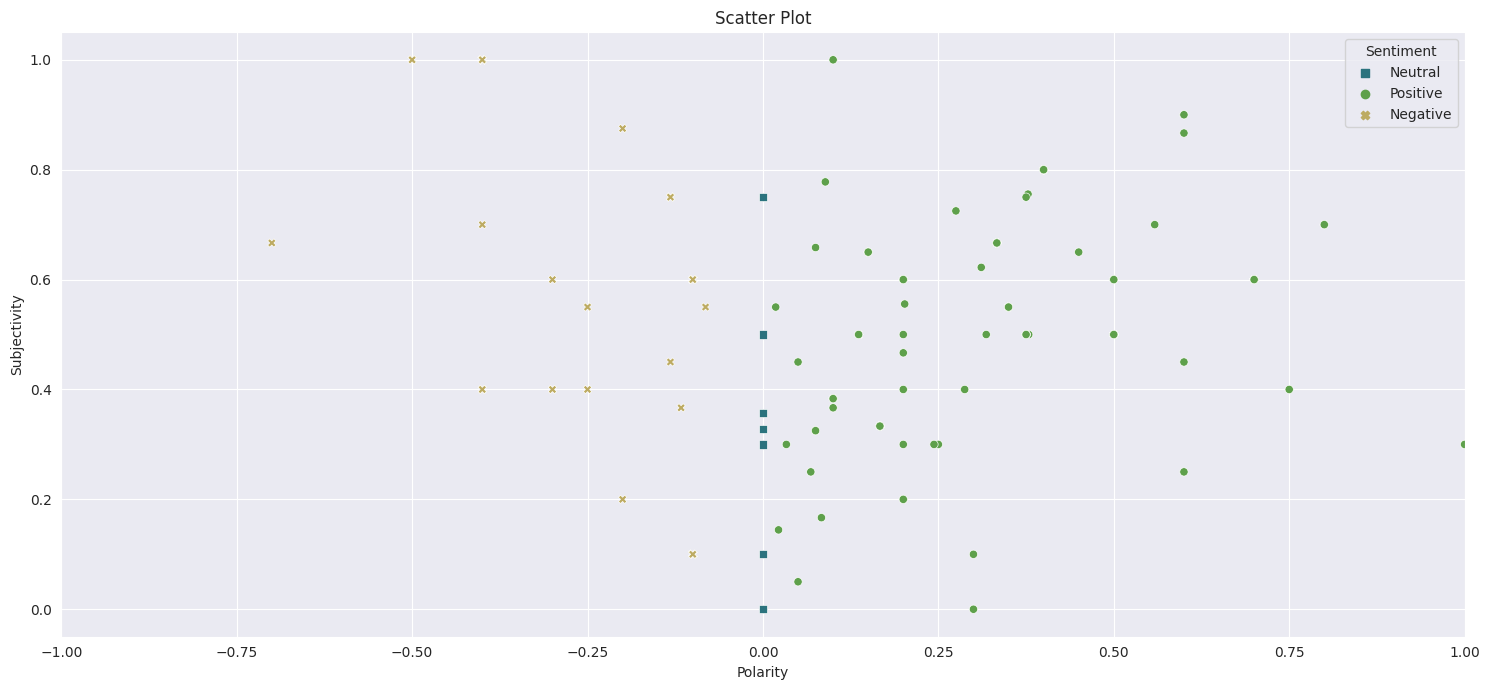

In [313]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (15,7))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=name_dataframe, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

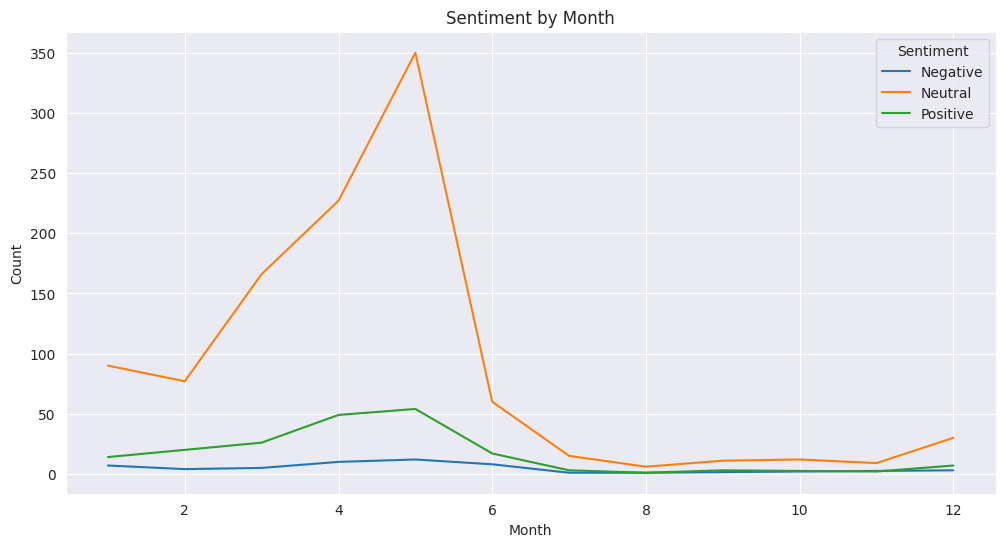

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by month and sentiment
sentiment_df = name_dataframe.groupby(['month', 'Sentiment']).size().reset_index(name='Count')


# Plot the sentiment counts by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Count', hue='Sentiment', data=sentiment_df)
plt.title('Sentiment by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

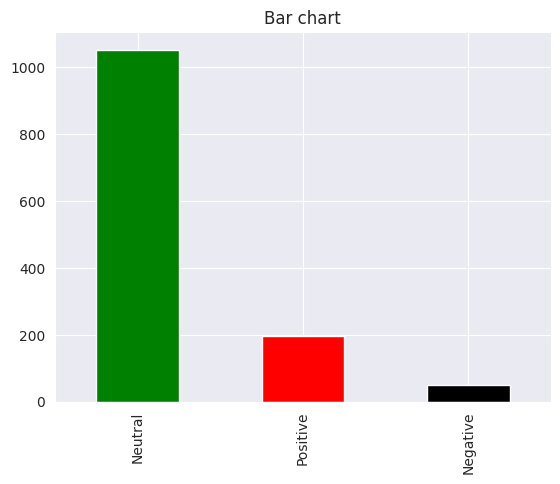

In [315]:
sentimen_data=pd.value_counts(name_dataframe["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red", "black"])
plt.title('Bar chart')
plt.show()

In [316]:
name_dataframe["Sentiment"].value_counts()

Neutral     1053
Positive     196
Negative      51
Name: Sentiment, dtype: int64

In [317]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [318]:
Ulasan = name_dataframe['Ulasan_clean']

In [319]:
Ulasan.isnull().sum()

0

In [320]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3687


In [321]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'paylater': 2465,
 'batal': 300,
 'otomatis': 2397,
 'kadang': 1462,
 'nya': 2305,
 'ganti': 1147,
 'jatuh': 1398,
 'tempo': 3313,
 'bayar': 309,
 'biaya': 440,
 'lambat': 1786,
 'layan': 1825,
 'biar': 436,
 'rasa': 2727,
 'sistem': 3112,
 'enak': 1032,
 'chat': 703,
 'susah': 3217,
 'error': 1047,
 'salah': 2869,
 'bikin': 447,
 'pusing': 2706,
 'kembali': 1548,
 'dana': 792,
 'berfungsisy': 389,
 'butuh': 627,
 'banget': 256,
 'ajuin': 59,
 'komplainada': 1652,
 'tombol': 3432,
 'komplain': 1651,
 'diarahin': 862,
 'pusat': 2703,
 'bantu': 268,
 'aju': 58,
 'pembatalanpengembalian': 2510,
 'aplikasi': 164,
 'payahmenyulitkan': 2463,
 'konsumen': 1675,
 'kesini': 1586,
 'buka': 551,
 'lapak': 1800,
 'bagus': 218,
 'komplan': 1654,
 'beberapakali': 318,
 'transaksi': 3451,
 'rekening': 2762,
 'deh': 826,
 'potong': 2642,
 'verifikasi': 3581,
 'kalo': 1479,
 'pengin': 2538,
 'menu': 2090,
 'upload': 3552,
 'bukti': 608,
 'muncul': 2175,
 'kali': 1475,
 'hilang': 1274,
 'uang': 3507,
 

In [322]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 300)	1
  (0, 309)	1
  (0, 436)	1
  (0, 440)	2
  (0, 447)	1
  (0, 703)	1
  (0, 1032)	1
  (0, 1047)	1
  (0, 1147)	2
  (0, 1398)	1
  (0, 1462)	2
  (0, 1786)	1
  (0, 1825)	2
  (0, 2305)	3
  (0, 2397)	1
  (0, 2465)	1
  (0, 2706)	2
  (0, 2727)	2
  (0, 2869)	1
  (0, 3112)	1
  (0, 3217)	1
  (0, 3313)	1
  (1, 58)	1
  (1, 59)	1
  (1, 164)	1
  :	:
  (1294, 338)	1
  (1294, 3099)	1
  (1295, 58)	1
  (1295, 479)	1
  (1295, 1243)	1
  (1295, 1438)	1
  (1295, 1941)	1
  (1295, 2809)	1
  (1295, 3423)	1
  (1296, 218)	1
  (1296, 1825)	1
  (1296, 3401)	1
  (1297, 280)	1
  (1297, 2407)	1
  (1297, 2726)	1
  (1297, 3335)	1
  (1298, 1825)	1
  (1298, 1988)	1
  (1299, 164)	1
  (1299, 218)	1
  (1299, 551)	1
  (1299, 1069)	1
  (1299, 1500)	1
  (1299, 1800)	1
  (1299, 3335)	1


In [323]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

kembali dana otomatis berfungsisy butuh banget dana ajuin komplainada tombol komplain diarahin pusat bantu tombol aju pembatalanpengembalian dana aplikasi payahmenyulitkan konsumen


In [324]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 58)	1
  (0, 59)	1
  (0, 164)	1
  (0, 256)	1
  (0, 268)	1
  (0, 389)	1
  (0, 627)	1
  (0, 792)	3
  (0, 862)	1
  (0, 1548)	1
  (0, 1651)	1
  (0, 1652)	1
  (0, 1675)	1
  (0, 2397)	1
  (0, 2463)	1
  (0, 2510)	1
  (0, 2703)	1
  (0, 3432)	2


In [325]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[7.4777413  6.78459412 7.07227619 ... 6.78459412 7.4777413  7.4777413 ]
  (0, 3432)	0.44717590187905687
  (0, 2703)	0.21350471778843313
  (0, 2510)	0.2620942219590954
  (0, 2463)	0.2620942219590954
  (0, 2397)	0.15219540569405482
  (0, 1675)	0.17804818842814654
  (0, 1652)	0.2620942219590954
  (0, 1651)	0.12132032500681049
  (0, 1548)	0.15538395909260494
  (0, 862)	0.2620942219590954
  (0, 792)	0.3970916698984765
  (0, 627)	0.16717728351427483
  (0, 389)	0.2620942219590954
  (0, 268)	0.11219742366396823
  (0, 256)	0.1216375210028929
  (0, 164)	0.0796942124678904
  (0, 59)	0.2620942219590954
  (0, 58)	0.17087016098572574


In [326]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_clean", "Sentiment"]]

In [327]:
data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-327-5732072d6cca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")


In [328]:
data_label.to_excel("data_label.xlsx")

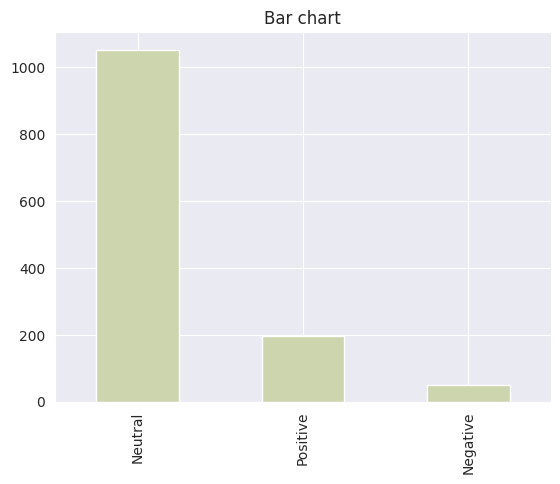

In [329]:
sentimen_data=pd.value_counts(data_label["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["#ccd5ae"])
plt.title('Bar chart')
plt.show()

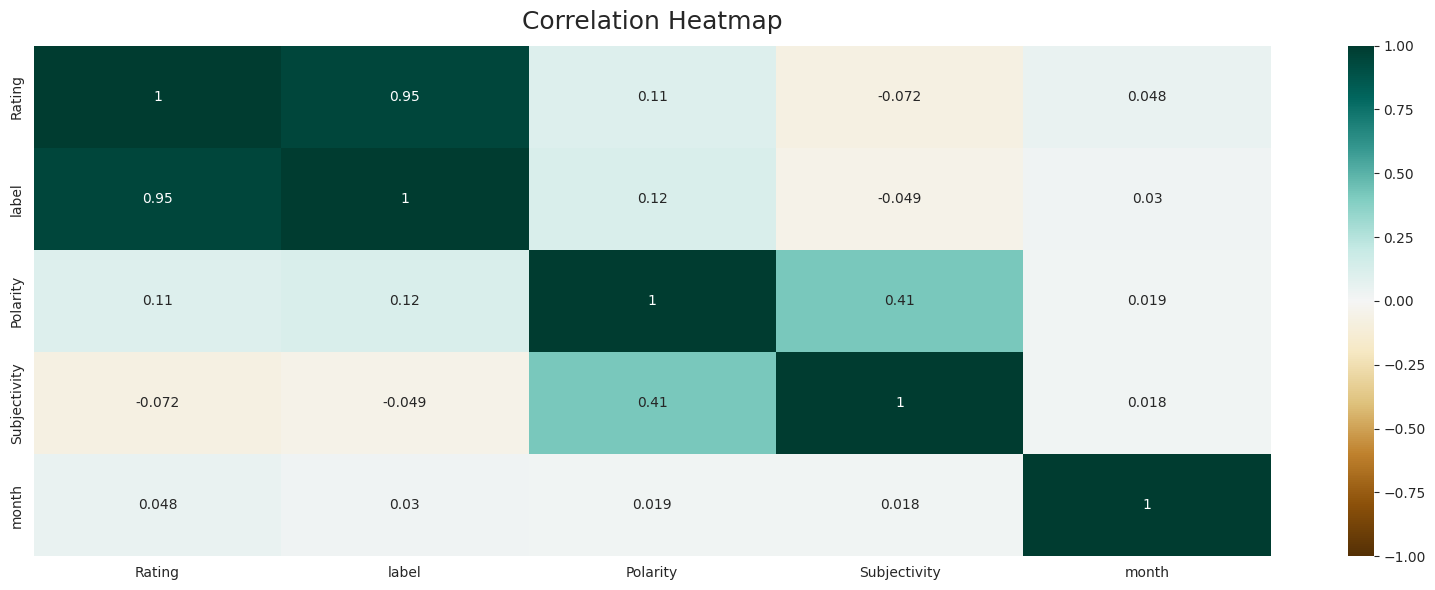

In [330]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(name_dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

In [331]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'ulasan_ears', 'Ulasan_normalized', 'Ulasan_stop_removed',
       'Ulasan_Stemmed', 'Ulasan_clean', 'label', 'Polarity', 'Subjectivity',
       'Sentiment', 'month'],
      dtype='object')

In [332]:
train_s3 = data_label[data_label["Sentiment"] == 'Neutral']

In [333]:
train_s3["Ulasan_clean"] = train_s3["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-333-0d6c2c4956f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s3["Ulasan_clean"] = train_s3["Ulasan_clean"].fillna("tidak ada komentar")


Neutral words


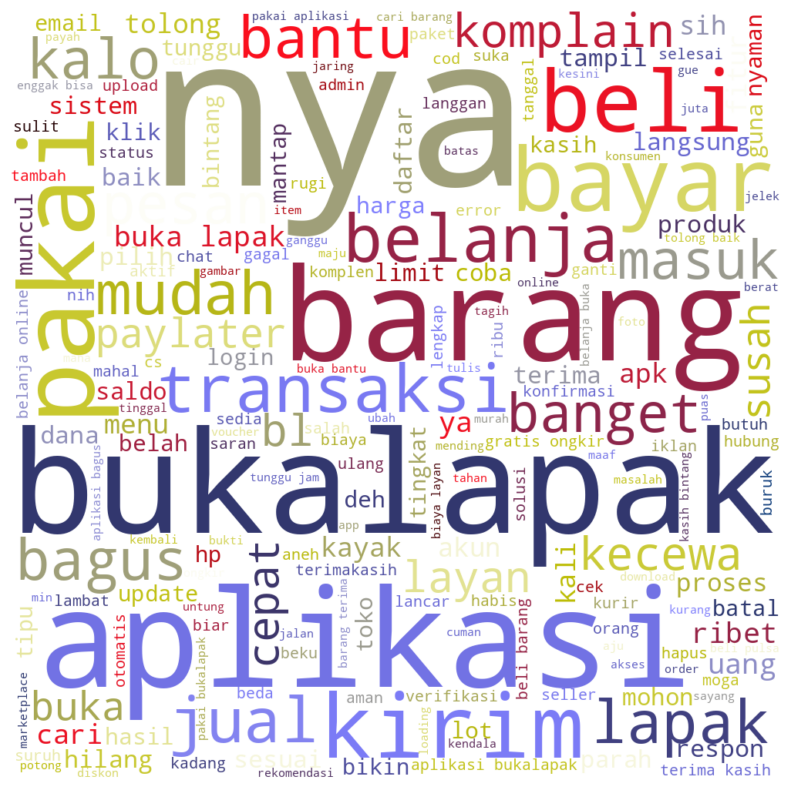

In [334]:
all_text_s0 = ' '.join(word for word in train_s3["Ulasan_clean"])
wordcloud = WordCloud(colormap='gist_stern', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
print("Neutral words")
plt.show()

In [335]:
from wordcloud import WordCloud

In [336]:
train_s0 = data_label[data_label["Sentiment"] == 'Negative']

In [337]:
train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-337-4a391e85ccb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")


In [338]:
train_s0

,Nama pengguna,Ulasan_clean,Sentiment
42,Ilham Padka Wijaya,bukalapak marketplace nya sellerseller tipu ka...,Negative
58,imam maliki,hati hubung akun aplkasi iniakun kena hack tra...,Negative
66,Afifur Rohman,aplikasi bagus minus ongkir mahal voucher paka...,Negative
75,Kaloka Galih Kayu Wangi,jual emas bukaemas susah banget banget problem...,Negative
76,Bam Hendrian,kesini sistem nya berat ajabanyak sisrem gunab...,Negative
138,eH boy,developer bukalapak lihat aplikasi shopee laza...,Negative
158,haidar dabi kataro,proses konfirmasi nya lamaproses kirim nya lam...,Negative
168,hidayat mudaris,tolong rumit verifikasi akun saldo bukalapak p...,Negative
170,Infinik smart6 Infinik smart6,bintang deh gagal pinjem alas pinjam tunai akt...,Negative
208,Candra Wijaya,aplikasi bangkai belanja barang minggu bayar a...,Negative


Negatif words


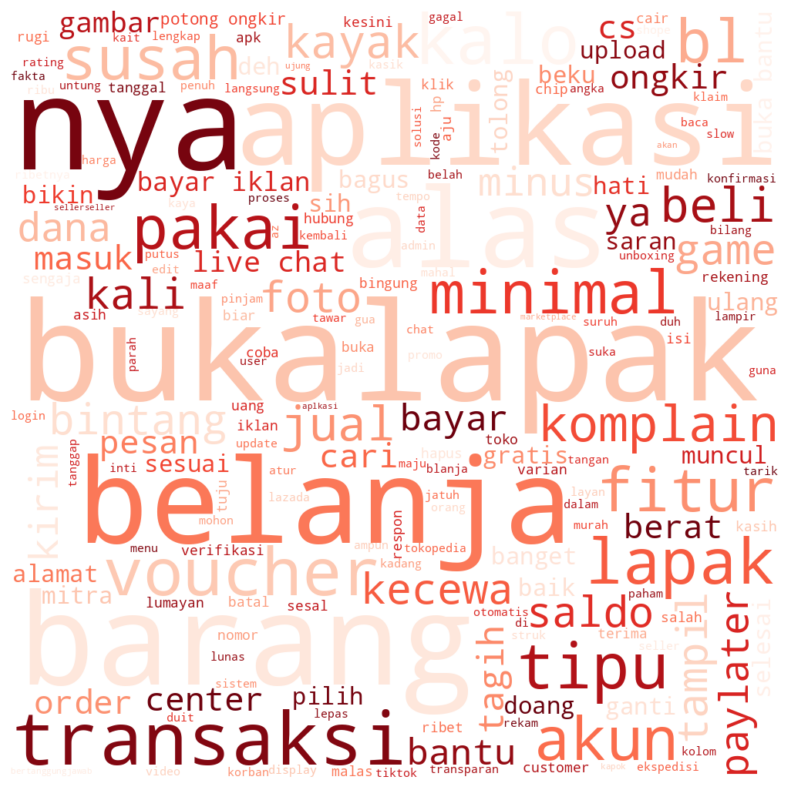

In [339]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
print("Negatif words")
plt.show()

In [340]:
train_s1 = data_label[data_label["Sentiment"] == 'Positive']

In [341]:
train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-341-89653e0cae75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")


In [342]:
train_s1

,Nama pengguna,Ulasan_clean,Sentiment
9,Triadhi Purna,batal pesan susah ya jual bilang ready stok ha...,Positive
11,Holil Ludin,salah commerce pakai worth halaman transaksi k...,Positive
12,Servis Tv CIPANAS CIANJUR,aplikasi parah trnsaksi pulsa berhasilpulsa ma...,Positive
13,Lutfipitrahadi Pitrahadi,kalo kosong kosong bintang bukalapakpercuma li...,Positive
19,dewi tan25,aplikais bukalapak parah kali pakai verifikasi...,Positive
...,...,...,...
1249,BIO TEKNO SELARAS,batal pesan sulit komplain live chat hubung ny...,Positive
1252,Pengguna Google,commerce nilai super nego pakai harga segitu t...,Positive
1254,KARMAD ZAIN,kecewa aplikasi bukalapak fitur zonk spin top ...,Positive
1280,Payung,woy transaksi gua gara gara chat nya lu beku l...,Positive


Positif words


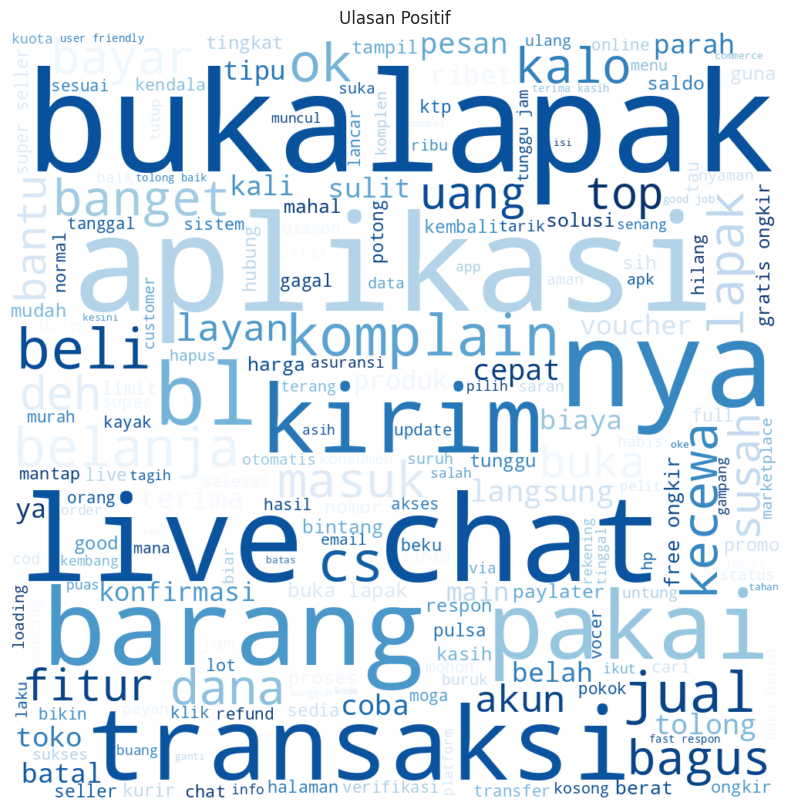

In [343]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
print("Positif words")
plt.show()

In [344]:
data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")

<ipython-input-344-27b828896519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")


In [345]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['Sentiment'], 
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

In [346]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [347]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_label['Ulasan_clean'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data_label['Sentiment'], test_size=0.2, random_state=42)

# Train the Gaussian Naive Bayes classifier on the training set
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)

# Evaluate the classifier on the testing set
accuracy = gnb.score(X_test.toarray(), y_test)
print('Accuracy:', accuracy)

# Use the classifier to predict the sentiment class for all reviews in the dataset
data_label['predicted_sentiment_class'] = gnb.predict(X.toarray())

# Save the resulting dataframe to a new CSV file
data_label.to_csv('predicted_sentiment1.csv', index=False)

Accuracy: 0.5230769230769231


<ipython-input-347-35ea0f31f4f4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['predicted_sentiment_class'] = gnb.predict(X.toarray())


In [348]:
import numpy as np

X_train = X_train.toarray()
X_test = X_test.toarray()


In [349]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Gaussian Naive Bayes with original data
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb = gnb.predict(X_test)
print('Original Results:')
print(classification_report(y_test, y_gnb))
print(confusion_matrix(y_test, y_gnb))
print('Accuracy with original test data:', accuracy_score(y_test, y_gnb))

# Gaussian Naive Bayes with undersampling
rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
gnb = GaussianNB()
gnb.fit(X_rus, y_rus)
y_gnb = gnb.predict(X_test)
print('Undersampling Results:')
print(classification_report(y_test, y_gnb))
print('Accuracy with undersampling test data:', accuracy_score(y_test, y_gnb))

# Gaussian Naive Bayes with oversampling
smote = SMOTE(random_state=1)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
gnb = GaussianNB()
gnb.fit(X_smote, y_smote)
y_gnb = gnb.predict(X_test)
print('Oversampling Results:')
print(classification_report(y_test, y_gnb))
print('Accuracy with oversampling test data:', accuracy_score(y_test, y_gnb))

# Gaussian Naive Bayes with combined oversampling and undersampling
rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

smote = SMOTE(random_state=1)
X_smt, y_smt = smote.fit_resample(X_rus, y_rus)

gnb = GaussianNB()
gnb.fit(X_smt, y_smt)
y_gnb = gnb.predict(X_test)
print('Combined Oversampling and Undersampling Results:')
print(classification_report(y_test, y_gnb))
print('Accuracy with combined oversampling and undersampling test data:', accuracy_score(y_test, y_gnb))


Original Results:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.83      0.56      0.66       209
    Positive       0.20      0.50      0.29        40

    accuracy                           0.52       260
   macro avg       0.34      0.35      0.32       260
weighted avg       0.70      0.52      0.58       260

[[  0   7   4]
 [ 17 116  76]
 [  3  17  20]]
Accuracy with original test data: 0.5230769230769231
Undersampling Results:
              precision    recall  f1-score   support

    Negative       0.10      0.73      0.18        11
     Neutral       0.93      0.48      0.63       209
    Positive       0.28      0.53      0.37        40

    accuracy                           0.50       260
   macro avg       0.44      0.58      0.39       260
weighted avg       0.79      0.50      0.57       260

Accuracy with undersampling test data: 0.49615384615384617
Oversampling Results:
              pre

In [350]:
import numpy as np

In [351]:
from sklearn.feature_extraction.text import TfidfVectorizer             #menghitung n menjumlah kan dan menjumlah kan tf and n berdasarkan seluruh dokumen 
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [352]:
data_label['predicted_sentiment_class'].value_counts()

Neutral     875
Positive    342
Negative     83
Name: predicted_sentiment_class, dtype: int64

<Axes: >

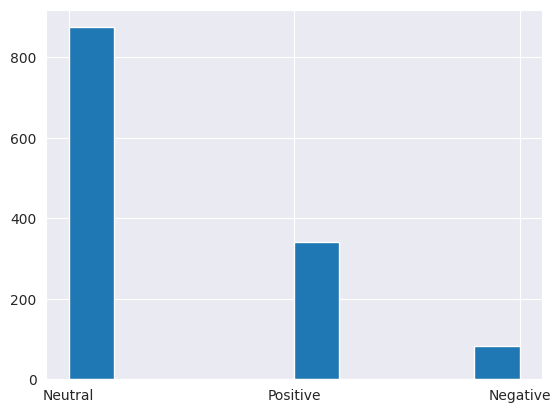

In [353]:
data_label['predicted_sentiment_class'].hist()

In [354]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**sample random**

mengambil secara acak dari daftar sample atau sampling frame yang tersedia setiap individu memiliki peluang yang sama untuk terpilih
peluang tersebut ada melakukan peluang sama ketika mempunyai data besar akan memliki peluang lebih besar untuk terpilih tetapi sebaliknya ketika mempunyai data dikit dapat peluang lebih sedikit

In [355]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['Sentiment'], 
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create the Naive Bayes Classifier object
gnb = GaussianNB()

# Perform cross-validation
scores = cross_val_score(gnb, X_train.toarray(), y_train, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', scores)

# Fit the classifier to the training data
gnb.fit(X_train.toarray(), y_train)

# Predict the sentiment of the test data
y_pred = gnb.predict(X_test.toarray())

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Cross-validation scores: [0.6025641  0.54273504 0.55555556 0.58119658 0.52136752]
Confusion Matrix:
 [[ 1  4  0]
 [ 7 67 31]
 [ 1  9 10]]


In [356]:
# Convert sparse matrix to dense numpy array
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Print the scores on the training and test sets
print('Training set score: {:.4f}'.format(gnb.score(X_train_dense, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test_dense, y_test)))


Training set score: 0.8880
Test set score: 0.6000


In [357]:
accuracy = gnb.score(X_test.toarray(), y_test)
print('Accuracy:', accuracy)

Accuracy: 0.6


In [358]:
vectorizer

TfidfVectorizer()

In [359]:
nb = GaussianNB(var_smoothing=1.0) # untuk tidak overviting

In [360]:
data_label

,Nama pengguna,Ulasan_clean,Sentiment,predicted_sentiment_class
0,Nizar Rayyan,paylater batal otomatis kadang nya ganti jatuh...,Neutral,Neutral
1,Ganjar Hermadi,kembali dana otomatis berfungsisy butuh banget...,Neutral,Neutral
2,Fandy Komo,kesini buka lapak bagus layan komplan susah su...,Neutral,Neutral
3,Musthofa Zainul,guna bukalapak bingung adu transaksi masalah l...,Neutral,Neutral
4,Yuda Nugraha,update aco aplikasi menu barang favorit enggak...,Neutral,Neutral
...,...,...,...,...
1295,styleispassion,maaf jual bl aju hapus toko ribet,Neutral,Negative
1296,Muhyi Fadli,bagus tingkat layan,Neutral,Negative
1297,Dasa Eka,barang terima packing rapi,Neutral,Neutral
1298,mulyanajayameuble meuble,mantapluar layan,Neutral,Neutral


In [361]:
cm = confusion_matrix(y_test,y_pred)

In [362]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred))

--------------------- confusion matrix  ----------------------------
[[ 1  4  0]
 [ 7 67 31]
 [ 1  9 10]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

    Negative       0.11      0.20      0.14         5
     Neutral       0.84      0.64      0.72       105
    Positive       0.24      0.50      0.33        20

    accuracy                           0.60       130
   macro avg       0.40      0.45      0.40       130
weighted avg       0.72      0.60      0.64       130



In [363]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [364]:
# print classification error kesalahan klasifikasi 

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1392


In [365]:

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8608


<Axes: >

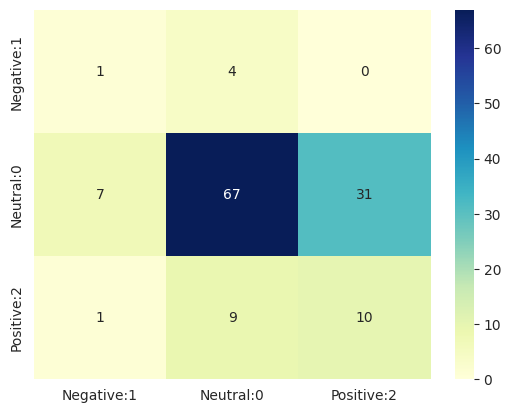

In [366]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Neutral:0', 'Positive:2'], 
                                 index=['Negative:1', 'Neutral:0', 'Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [367]:
X_test

<130x3431 sparse matrix of type '<class 'numpy.float64'>'
	with 1573 stored elements in Compressed Sparse Row format>

In [368]:
X_train

<1170x3431 sparse matrix of type '<class 'numpy.float64'>'
	with 16339 stored elements in Compressed Sparse Row format>

In [369]:
y_test

316      Neutral
1258     Neutral
932     Negative
1139     Neutral
1144     Neutral
          ...   
471      Neutral
534     Positive
902      Neutral
1023    Positive
429      Neutral
Name: Sentiment, Length: 130, dtype: object

In [370]:
y_train

362     Neutral
310     Neutral
997     Neutral
93      Neutral
239     Neutral
         ...   
821     Neutral
844     Neutral
1009    Neutral
497     Neutral
618     Neutral
Name: Sentiment, Length: 1170, dtype: object

In [371]:
print(y_train)

362     Neutral
310     Neutral
997     Neutral
93      Neutral
239     Neutral
         ...   
821     Neutral
844     Neutral
1009    Neutral
497     Neutral
618     Neutral
Name: Sentiment, Length: 1170, dtype: object


<Axes: >

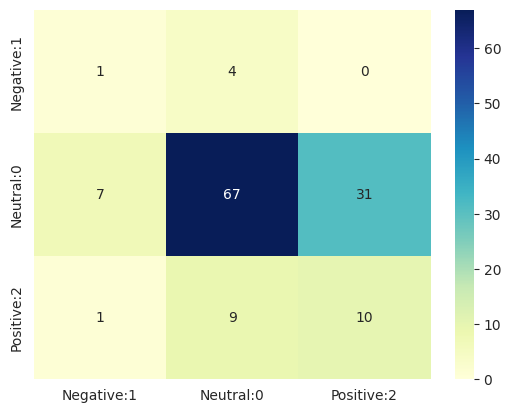

In [372]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Neutral:0', 'Positive:2'], 
                                 index=['Negative:1', 'Neutral:0', 'Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [373]:
cm = confusion_matrix(y_test,y_pred)

In [374]:

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 1  4  0]
 [ 7 67 31]
 [ 1  9 10]]


In [375]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [376]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [377]:
# Regresi Logistik
logreg = LogisticRegression()
# SVM
svm = SVC(probability=True)

In [378]:
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(probability=True)

In [379]:
y_pred1_logreg = logreg.predict(X_test)
y_pred1_svm = svm.predict(X_test)

In [380]:
print('---------------  Regresi Logistik  -------------------')
print(classification_report(y_test, y_pred1_logreg))
print('--------------------- SVM ----------------------------')
print(classification_report(y_test, y_pred1_svm))

---------------  Regresi Logistik  -------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.85      1.00      0.92       105
    Positive       1.00      0.30      0.46        20

    accuracy                           0.85       130
   macro avg       0.62      0.43      0.46       130
weighted avg       0.84      0.85      0.81       130

--------------------- SVM ----------------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.84      1.00      0.91       105
    Positive       1.00      0.25      0.40        20

    accuracy                           0.85       130
   macro avg       0.61      0.42      0.44       130
weighted avg       0.83      0.85      0.80       130



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif